In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
%matplotlib inline

In [24]:
#loading dataset

df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [25]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [26]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [28]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
#NO NULL values

# Data Preprocessing

In [29]:
#duplicates removal

df.drop_duplicates(inplace=True)

In [30]:
df.shape

(579, 7)

In [9]:
# Outliers removal

In [31]:
df=df[(df['TotalFloor']<26)]

In [32]:
df=df[(df['Bedroom']<6)]

In [33]:
df=df[(df['Living.Room']<4)]

In [34]:
df=df[(df['Sqft']<4000)]

In [35]:
df.shape

(570, 7)

In [37]:
#performing standard scaling

scaler=StandardScaler()
df[['Sqft','Price']]=scaler.fit_transform(df[['Sqft','Price']])

In [38]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.438893,2,7,2,2,2,0.054892
1,0.940508,5,7,4,2,2,0.531724
2,-0.495300,5,7,2,2,1,-0.064315
3,-0.033790,2,7,3,2,2,-0.451741
4,-0.741438,11,14,3,2,2,-0.451741


In [41]:
array1=df.iloc[:,[0,6]]

In [44]:
#identifying optimal number of clusters

distortions=[]
inertias=[]
mapping1={}
mapping2={}
K_range=range(1,15)

array1=df.iloc[:,[0,6]]


for k in K_range:
    model=KMeans(n_clusters=k)
    model.fit(array1)
    distortions.append(sum(np.min(cdist(array1,model.cluster_centers_,'euclidean'),axis=1))/array1.shape[0])
    inertias.append(model.inertia_)
    mapping1[k]=sum(np.min(cdist(array1,model.cluster_centers_,'euclidean'),axis=1))/array1.shape[0]
    mapping2[k]=model.inertia_


1: 1.1376005849413666
2: 0.7565018550992259
3: 0.6111412757726508
4: 0.4939901664520449
5: 0.4462477247380697
6: 0.41733424242700096
7: 0.3999486041561674
8: 0.3686280015588206
9: 0.35280964316672175
10: 0.3252890989529815
11: 0.30960740639930107
12: 0.29628960469286364
13: 0.2830185953939754
14: 0.2713917375170019


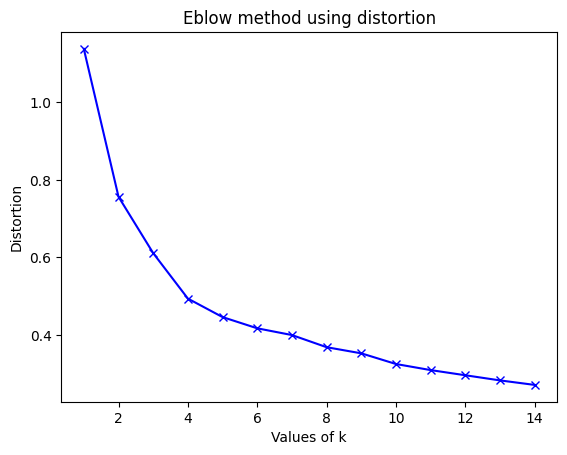

In [45]:
for key,val in mapping1.items():
    print(str(key)+': '+str(val))

    
plt.plot(K_range,distortions,'bx-')
plt.xlabel('Values of k')
plt.ylabel('Distortion')
plt.title('Eblow method using distortion')
plt.show()

1: 1140.0000000000002
2: 479.6473456217561
3: 289.85303963081805
4: 205.9819146459059
5: 164.96164001006193
6: 136.21714379629157
7: 120.25019630489628
8: 105.84016412564608
9: 93.56001955179214
10: 83.78383625936792
11: 75.07524591663183
12: 67.96516439705331
13: 61.794506981095296
14: 57.36933128674806


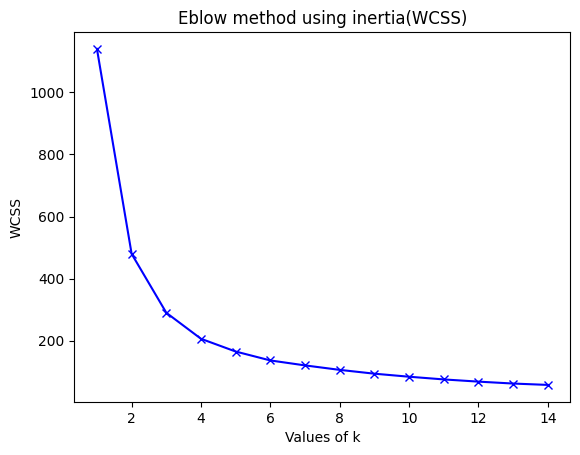

In [46]:
for key,val in mapping2.items():
    print(str(key)+': '+str(val))

    
plt.plot(K_range,inertias,'bx-')
plt.xlabel('Values of k')
plt.ylabel('WCSS')
plt.title('Eblow method using inertia(WCSS)')
plt.show()

In [51]:
#printing centroids

data=pd.DataFrame(array1,columns=('Sqft','Price'))

kmeans=KMeans(n_clusters=4).fit(data)
centroids=kmeans.cluster_centers_
print('centroids :\n',centroids)

centroids :
 [[-0.99326841 -0.74975947]
 [ 0.89996122  0.80936371]
 [-0.0341581  -0.27141569]
 [ 2.36195794  2.88730061]]


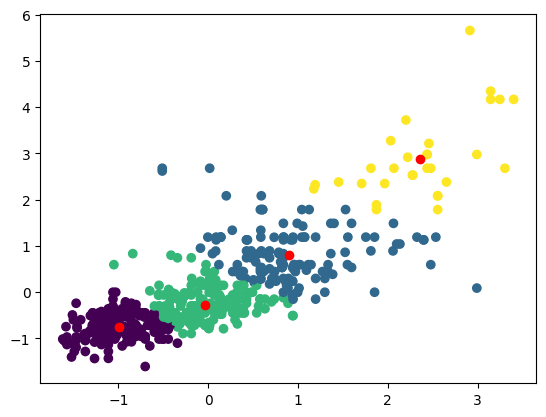

In [52]:
plt.scatter(data['Sqft'],data['Price'],c=kmeans.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.show()

In [53]:
kmeans.labels_

array([2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 3, 0,
       1, 3, 1, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 3, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 3, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2,
       3, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       1, 1, 2, 0, 1, 1, 3, 1, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 1, 0, 0,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 3,
       1, 2, 3, 0, 3, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 3, 1, 0, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 0, 3, 1, 0, 2, 2, 3, 0, 2, 1,

In [54]:
df['Category']=kmeans.labels_

In [55]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Category
0,-0.438893,2,7,2,2,2,0.054892,2
1,0.940508,5,7,4,2,2,0.531724,1
2,-0.495300,5,7,2,2,1,-0.064315,2
3,-0.033790,2,7,3,2,2,-0.451741,2
4,-0.741438,11,14,3,2,2,-0.451741,0
